# Import

In [1]:
%matplotlib inline 

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from collections import Counter

In [2]:
from google.colab import drive
drive.mount("/content/gdrive",force_remount = True)

Mounted at /content/gdrive


# Reading Train Data & Overview

In [3]:
data_folder = "/content/gdrive/My Drive/Colab Notebooks/Descartes Technical Test/auto-insurance-fall-2017/"

In [4]:
df_train = pd.read_csv(data_folder + "train_auto.csv")
df_train

,INDEX,TARGET_FLAG,TARGET_AMT,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,SEX,EDUCATION,JOB,TRAVTIME,CAR_USE,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,URBANICITY
0,1,0,0.0,0,60.0,0,11.0,"$67,349",No,$0,z_No,M,PhD,Professional,14,Private,"$14,230",11,Minivan,yes,"$4,461",2,No,3,18.0,Highly Urban/ Urban
1,2,0,0.0,0,43.0,0,11.0,"$91,449",No,"$257,252",z_No,M,z_High School,z_Blue Collar,22,Commercial,"$14,940",1,Minivan,yes,$0,0,No,0,1.0,Highly Urban/ Urban
2,4,0,0.0,0,35.0,1,10.0,"$16,039",No,"$124,191",Yes,z_F,z_High School,Clerical,5,Private,"$4,010",4,z_SUV,no,"$38,690",2,No,3,10.0,Highly Urban/ Urban
3,5,0,0.0,0,51.0,0,14.0,NaN,No,"$306,251",Yes,M,<High School,z_Blue Collar,32,Private,"$15,440",7,Minivan,yes,$0,0,No,0,6.0,Highly Urban/ Urban
4,6,0,0.0,0,50.0,0,NaN,"$114,986",No,"$243,925",Yes,z_F,PhD,Doctor,36,Private,"$18,000",1,z_SUV,no,"$19,217",2,Yes,3,17.0,Highly Urban/ Urban
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8156,10297,0,0.0,0,35.0,0,11.0,"$43,112",No,$0,z_No,M,z_High School,z_Blue Collar,51,Commercial,"$27,330",10,Panel Truck,yes,$0,0,No,0,8.0,z_Highly Rural/ Rural
8157,10298,0,0.0,1,45.0,2,9.0,"$164,669",No,"$386,273",Yes,M,PhD,Manager,21,Private,"$13,270",15,Minivan,no,$0,0,No,2,17.0,Highly Urban/ Urban
8158,10299,0,0.0,0,46.0,0,9.0,"$107,204",No,"$332,591",Yes,M,Masters,NaN,36,Commercial,"$24,490",6,Panel Truck,no,$0,0,No,0,1.0,Highly Urban/ Urban
8159,10301,0,0.0,0,50.0,0,7.0,"$43,445",No,"$149,248",Yes,z_F,Bachelors,Home Maker,36,Private,"$22,550",6,Minivan,no,$0,0,No,0,11.0,Highly Urban/ Urban


**Train data size** : 8161 rows × 26 columns 

**features** : 
- *INDEX* is a column to drop
- *TARGET_FLAG* is our target
- "*TARGET_AMT*" is also related to the target
- **numerical features** : "*KIDSDRIV*", "*AGE*", "*HOMEKIDS*", "*YOJ*", "*TRAVTIME*", "*TIF*", "*CLM_FREQ*", "*MVR_PTS*" and "*CAR_AGE*" 
- **Categorical features** : "*PARENT1*", "*MSTATUS*", "*SEX*", "*EDUCATION*", "*JOB*", "*CAR_USE*", "*CAR_TYPE*", "*RED_CAR*", "*REVOKED*" and "*URBANICITY*"
- **Other** : "*INCOME*", "*HOME_VAL*", "*BLUEBOOK*" and "*OLDCLAIM*" Are numercial features indicating an amount of money. (Dollar sign to eliminate)






### Target Distribution

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


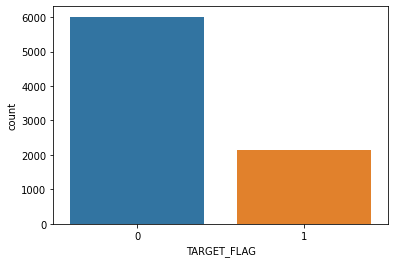

In [5]:
sns.countplot(df_train.TARGET_FLAG)

In [6]:
Counter(df_train.TARGET_FLAG)

Counter({0: 6008, 1: 2153})

TARGET_FLAG Values :
  - 0 with a frequency of 6008 (74 %)
  - 1 with a frequency of 2153 (26 %)

The data is quite imbalanced. Thus we can try an imbalanced learning model in the modeling phase.

### Missing values (nan)

In [7]:
round(df_train.isnull().mean() * 100,3)

INDEX          0.000
TARGET_FLAG    0.000
TARGET_AMT     0.000
KIDSDRIV       0.000
AGE            0.074
HOMEKIDS       0.000
YOJ            5.563
INCOME         5.453
PARENT1        0.000
HOME_VAL       5.686
MSTATUS        0.000
SEX            0.000
EDUCATION      0.000
JOB            6.445
TRAVTIME       0.000
CAR_USE        0.000
BLUEBOOK       0.000
TIF            0.000
CAR_TYPE       0.000
RED_CAR        0.000
OLDCLAIM       0.000
CLM_FREQ       0.000
REVOKED        0.000
MVR_PTS        0.000
CAR_AGE        6.249
URBANICITY     0.000
dtype: float64

We can keep all the columns and impute missing values

# Data Preprocessing

In [8]:
df_train = pd.read_csv(data_folder + "train_auto.csv")

In [9]:
df_train.drop(columns='INDEX', inplace=True) # Drop INDEX column

other_features = ["INCOME", "HOME_VAL", "BLUEBOOK", "OLDCLAIM"]
for feature in other_features :
  df_train[feature] = pd.to_numeric(df_train[feature].str.replace(',','.').str[1:])   #Eliminate the dollar sign and convert columns to numerical

In [10]:
df_train

,TARGET_FLAG,TARGET_AMT,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,SEX,EDUCATION,JOB,TRAVTIME,CAR_USE,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,URBANICITY
0,0,0.0,0,60.0,0,11.0,67.349,No,0.000,z_No,M,PhD,Professional,14,Private,14.23,11,Minivan,yes,4.461,2,No,3,18.0,Highly Urban/ Urban
1,0,0.0,0,43.0,0,11.0,91.449,No,257.252,z_No,M,z_High School,z_Blue Collar,22,Commercial,14.94,1,Minivan,yes,0.000,0,No,0,1.0,Highly Urban/ Urban
2,0,0.0,0,35.0,1,10.0,16.039,No,124.191,Yes,z_F,z_High School,Clerical,5,Private,4.01,4,z_SUV,no,38.690,2,No,3,10.0,Highly Urban/ Urban
3,0,0.0,0,51.0,0,14.0,NaN,No,306.251,Yes,M,<High School,z_Blue Collar,32,Private,15.44,7,Minivan,yes,0.000,0,No,0,6.0,Highly Urban/ Urban
4,0,0.0,0,50.0,0,NaN,114.986,No,243.925,Yes,z_F,PhD,Doctor,36,Private,18.00,1,z_SUV,no,19.217,2,Yes,3,17.0,Highly Urban/ Urban
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8156,0,0.0,0,35.0,0,11.0,43.112,No,0.000,z_No,M,z_High School,z_Blue Collar,51,Commercial,27.33,10,Panel Truck,yes,0.000,0,No,0,8.0,z_Highly Rural/ Rural
8157,0,0.0,1,45.0,2,9.0,164.669,No,386.273,Yes,M,PhD,Manager,21,Private,13.27,15,Minivan,no,0.000,0,No,2,17.0,Highly Urban/ Urban
8158,0,0.0,0,46.0,0,9.0,107.204,No,332.591,Yes,M,Masters,NaN,36,Commercial,24.49,6,Panel Truck,no,0.000,0,No,0,1.0,Highly Urban/ Urban
8159,0,0.0,0,50.0,0,7.0,43.445,No,149.248,Yes,z_F,Bachelors,Home Maker,36,Private,22.55,6,Minivan,no,0.000,0,No,0,11.0,Highly Urban/ Urban


# Data Analysis

In [11]:
numerical_features = ["KIDSDRIV", "AGE", "HOMEKIDS", "YOJ", "TRAVTIME", "TIF", "CLM_FREQ", "MVR_PTS", "CAR_AGE"] + other_features
Categorical_features = ["PARENT1", "MSTATUS", "SEX", "EDUCATION", "JOB", "CAR_USE", "CAR_TYPE", "RED_CAR", "REVOKED", "URBANICITY"]

### TARGET_AMT

In [12]:
df_train[df_train.TARGET_FLAG==1].TARGET_AMT

5       2946.000000
7       4021.000000
8       2501.000000
10      6077.000000
13      1267.000000
           ...     
8133    3106.000000
8134     471.115458
8137    3135.000000
8146    1815.205097
8148    2967.000000
Name: TARGET_AMT, Length: 2153, dtype: float64

In [13]:
Counter(df_train[df_train.TARGET_FLAG==0].TARGET_AMT)

Counter({0.0: 6008})

"*TARGET_AMT*" is equal to 0 when "*TARGET_FLAG*" is equel to 0.

## Numerical features : 

### AGE

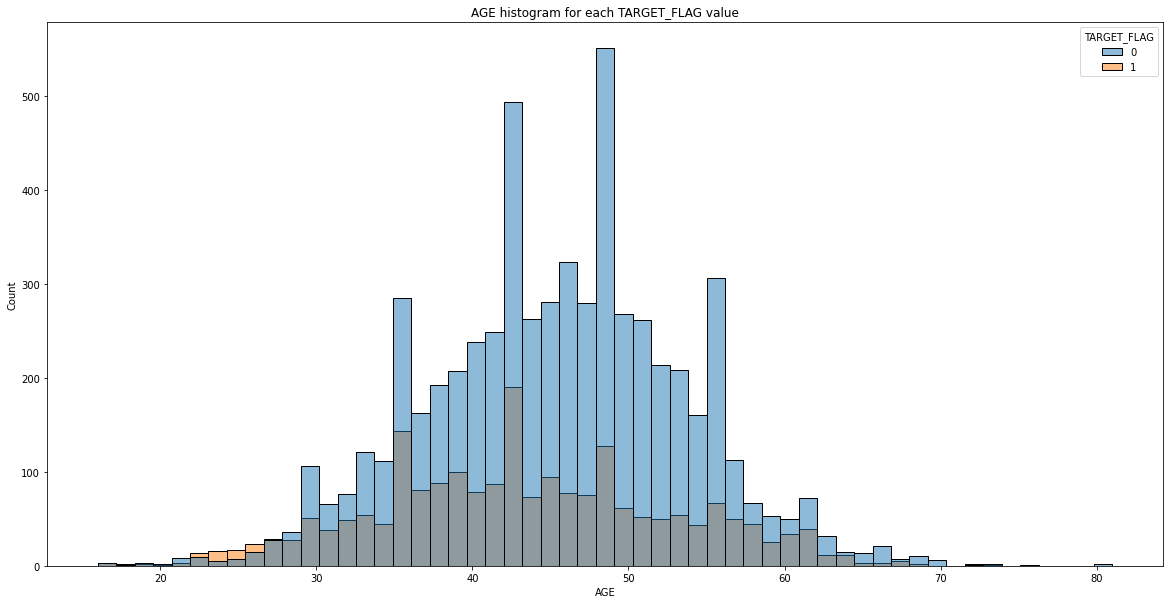

In [14]:
fig, ax = plt.subplots(figsize=(20,10))
sns.histplot(ax = ax, data = df_train, x='AGE', hue ='TARGET_FLAG')
plt.title("AGE histogram for each TARGET_FLAG value")
plt.show()

The AGE feature's distribution has a gaussian shape. The count of the 0_class of Target flags between the ages of 22 and 28 is greater than the 1_class. Maybe this means that people within this interval of age are more likely to be risky with a car.


### HOMEKIDS

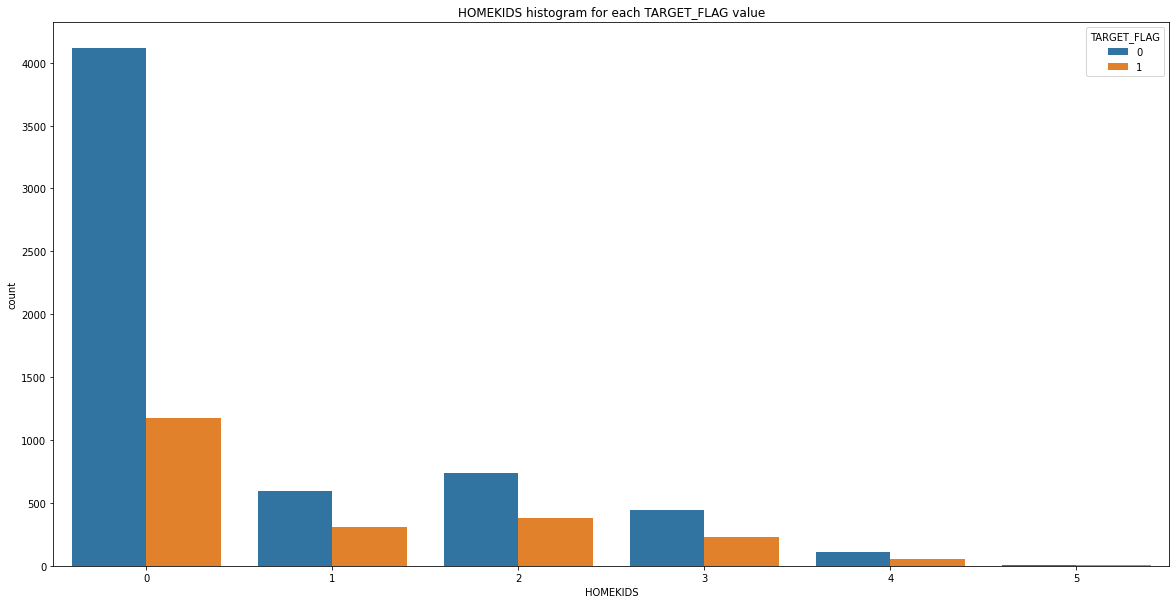

In [15]:
fig, ax = plt.subplots(figsize=(20,10))
sns.countplot(ax = ax, data = df_train, x='HOMEKIDS', hue ='TARGET_FLAG')
plt.title("HOMEKIDS histogram for each TARGET_FLAG value")
plt.show()


In [16]:
df_train[['TARGET_FLAG','HOMEKIDS']].groupby('HOMEKIDS').mean().sort_values(by='TARGET_FLAG')

,TARGET_FLAG
HOMEKIDS,
0,0.221781
1,0.338137
3,0.341246
2,0.341682
4,0.347561
5,0.428571


This feature indicates the number of kids in the family. The more kids you have the more risky you are.

### INCOME

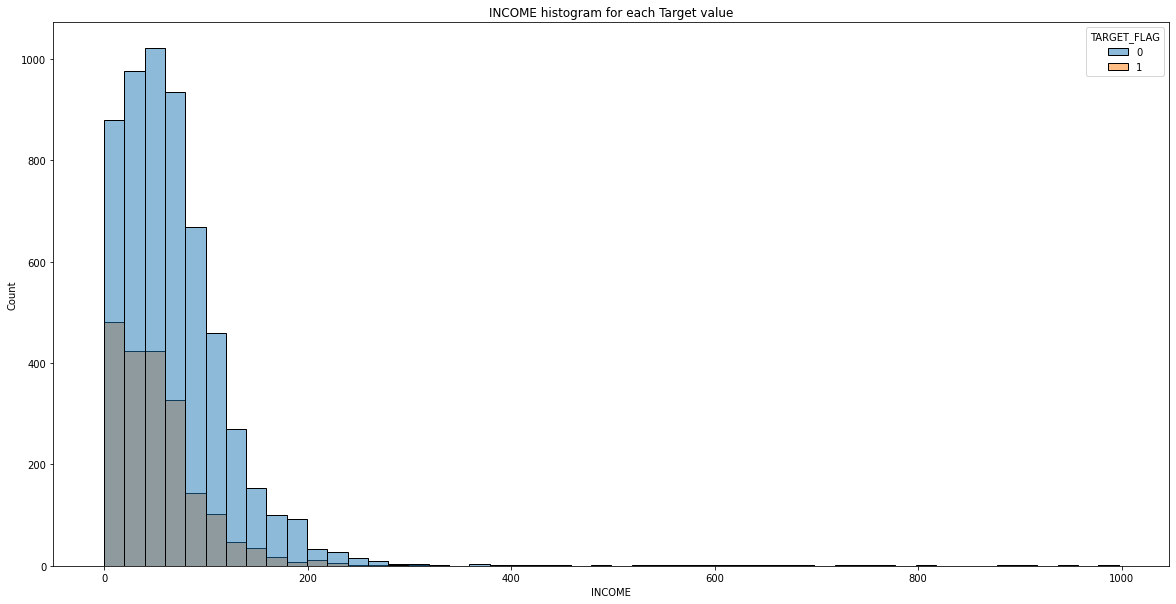

In [17]:
fig, ax = plt.subplots(figsize=(20,10))
sns.histplot(ax = ax, data = df_train, x='INCOME', hue ='TARGET_FLAG', bins=50)
plt.title("INCOME histogram for each Target value")
plt.show()

From this histogram we can deduce that the INCOME is an important feature. chances of TARGET_FLAG to be equal to 0 decrease when the income increases. Thus, the greater the income the less risky the person is.

### KIDSDRIV

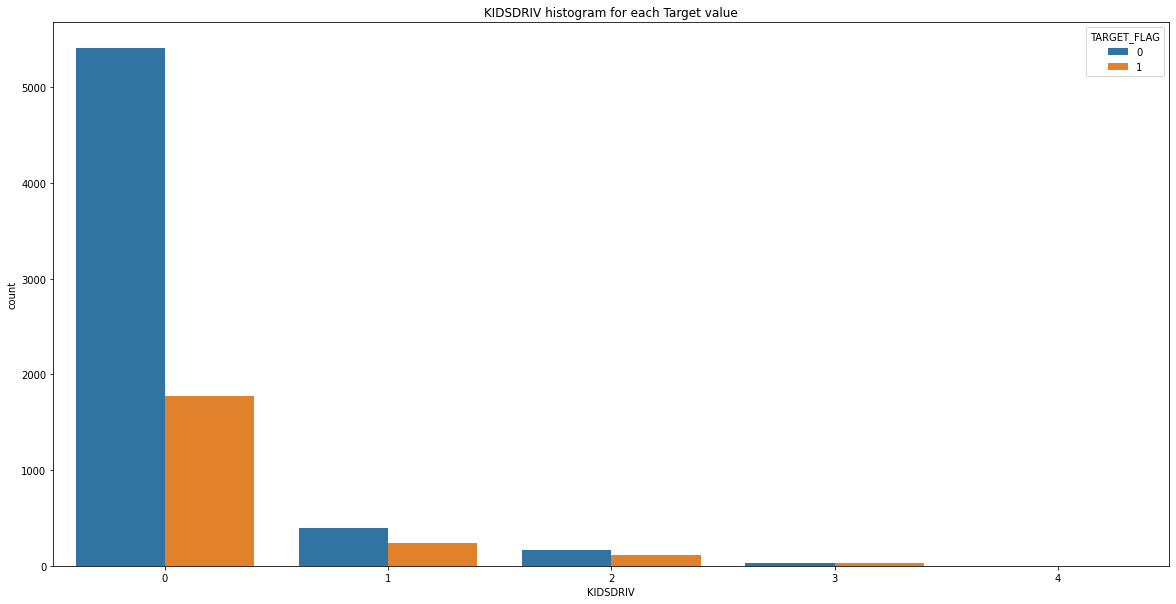

In [18]:
fig, ax = plt.subplots(figsize=(20,10))
sns.countplot(ax = ax, data = df_train, x='KIDSDRIV', hue ='TARGET_FLAG')
plt.title("KIDSDRIV histogram for each Target value")
plt.show()

In [19]:
df_train[['TARGET_FLAG','KIDSDRIV']].groupby('KIDSDRIV').mean().sort_values(by='TARGET_FLAG')

,TARGET_FLAG
KIDSDRIV,
0,0.246936
1,0.371069
2,0.397849
3,0.500000
4,0.500000


This feature may tell us about the number of kids who can drive, which should be taken in consideration as these kids will probably be driving the car in matter. Thus it is logical to see a greater risk for people with more kids.

### CLM_FREQ

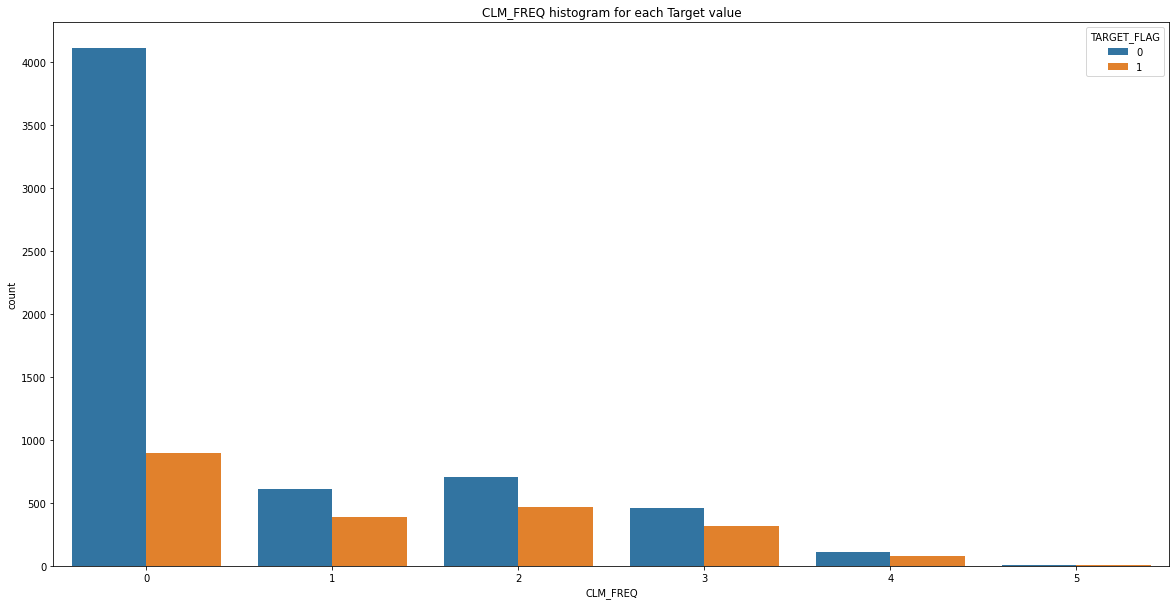

In [20]:
fig, ax = plt.subplots(figsize=(20,10))
sns.countplot(ax = ax, data = df_train, x='CLM_FREQ', hue ='TARGET_FLAG')
plt.title("CLM_FREQ histogram for each Target value")
plt.show()

Assuming that this feature is about the claim frequency for each individual, it is logical to see persons who have made previous claims to be more risky. That explains why the proportions of risky classes is higher when CLM_FREQ is higher.

### MVR_PTS

In [21]:
df_train[['TARGET_FLAG','MVR_PTS']].groupby('MVR_PTS').mean().sort_values(by='TARGET_FLAG')

,TARGET_FLAG
MVR_PTS,
0,0.192349
1,0.234226
2,0.279536
3,0.317942
4,0.342237
5,0.373434
6,0.390977
7,0.562874
8,0.654762


MVR_PTS stands for motor vehicle report which is a history of any past violations or accidents you've had as a driver. Insurance companies use it when calculating your rates. It is evident that when this number increases the risk is higher.

## Categorical features : 

### PARENT1

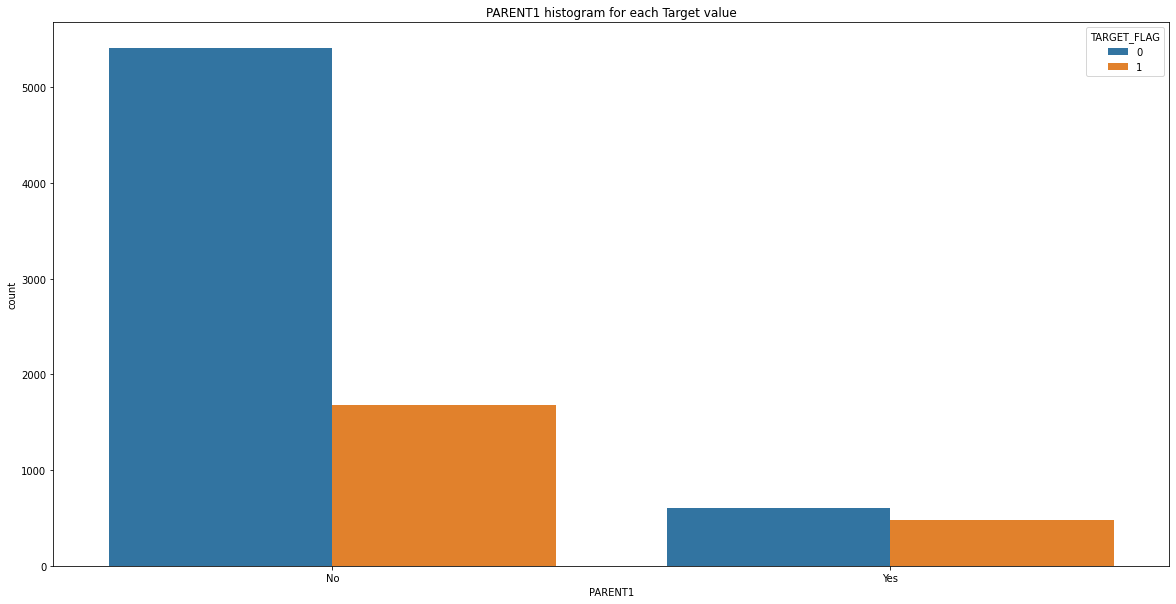

In [22]:
fig, ax = plt.subplots(figsize=(20,10))
sns.countplot(ax = ax, data = df_train, x='PARENT1', hue ='TARGET_FLAG')
# plt.xticks(rotation = 0)
plt.title("PARENT1 histogram for each Target value")
plt.show()

This feature may be indicating whether the person in question is a parent. Being a parent means that they have kids (probably even kids who drive). 

### SEX

In [23]:
df_train[['TARGET_FLAG','SEX']].groupby('SEX').mean().sort_values(by='TARGET_FLAG')

,TARGET_FLAG
SEX,
M,0.253830
z_F,0.272457


The SEX is not an important feature as the probability of being risky knowing that you are a Male or a Female is almost the same.

### MSTATUS

In [24]:
df_train[['TARGET_FLAG','MSTATUS']].groupby('MSTATUS').mean().sort_values(by='TARGET_FLAG')

,TARGET_FLAG
MSTATUS,
Yes,0.215161
z_No,0.336700


### EDUCATION

In [25]:
df_train[['TARGET_FLAG','EDUCATION']].groupby('EDUCATION').mean().sort_values(by='TARGET_FLAG')

,TARGET_FLAG
EDUCATION,
PhD,0.171703
Masters,0.197226
Bachelors,0.233274
<High School,0.320033
z_High School,0.340343


The probability of getting 0 as a TARGET_FLAG is greater for more educated people 

### JOB

In [26]:
df_train[['TARGET_FLAG','JOB']].groupby('JOB').mean().sort_values(by='TARGET_FLAG')

,TARGET_FLAG
JOB,
Doctor,0.117886
Manager,0.138664
Lawyer,0.183234
Professional,0.221128
Home Maker,0.280811
Clerical,0.291896
z_Blue Collar,0.347397
Student,0.373596


### CAR_USE

In [27]:
df_train[['TARGET_FLAG','CAR_USE']].groupby('CAR_USE').mean().sort_values(by='TARGET_FLAG')

,TARGET_FLAG
CAR_USE,
Private,0.215511
Commercial,0.345659


### CAR_TYPE

In [28]:
df_train[['TARGET_FLAG','CAR_TYPE']].groupby('CAR_TYPE').mean().sort_values(by='TARGET_FLAG')

,TARGET_FLAG
CAR_TYPE,
Minivan,0.162704
Panel Truck,0.263314
Van,0.268000
z_SUV,0.295554
Pickup,0.318934
Sports Car,0.335171


### REVOKED

In [29]:
df_train[['TARGET_FLAG','REVOKED']].groupby('REVOKED').mean().sort_values(by='TARGET_FLAG')

,TARGET_FLAG
REVOKED,
No,0.238793
Yes,0.443000


### RED_CAR

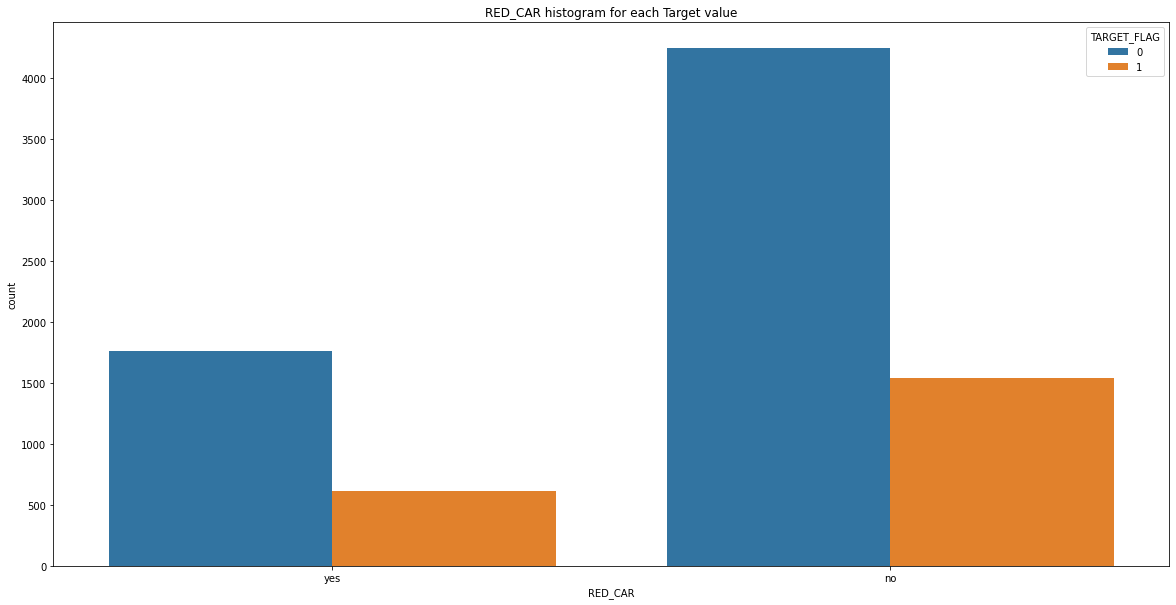

In [30]:
fig, ax = plt.subplots(figsize=(20,10))
sns.countplot(ax = ax, data = df_train, x='RED_CAR', hue ='TARGET_FLAG')
# plt.xticks(rotation = 0)
plt.title("RED_CAR histogram for each Target value")
plt.show()

In [31]:
df_train[['TARGET_FLAG','RED_CAR']].groupby('RED_CAR').mean().sort_values(by='TARGET_FLAG')

,TARGET_FLAG
RED_CAR,
yes,0.259041
no,0.265779


### REVOKED

In [32]:
df_train[['TARGET_FLAG','REVOKED']].groupby('REVOKED').mean().sort_values(by='TARGET_FLAG')

,TARGET_FLAG
REVOKED,
No,0.238793
Yes,0.443000


### URBANICITY

In [33]:
df_train[['TARGET_FLAG','URBANICITY']].groupby('URBANICITY').mean().sort_values(by='TARGET_FLAG')

,TARGET_FLAG
URBANICITY,
z_Highly Rural/ Rural,0.068904
Highly Urban/ Urban,0.313925


## Corrolation Matrix

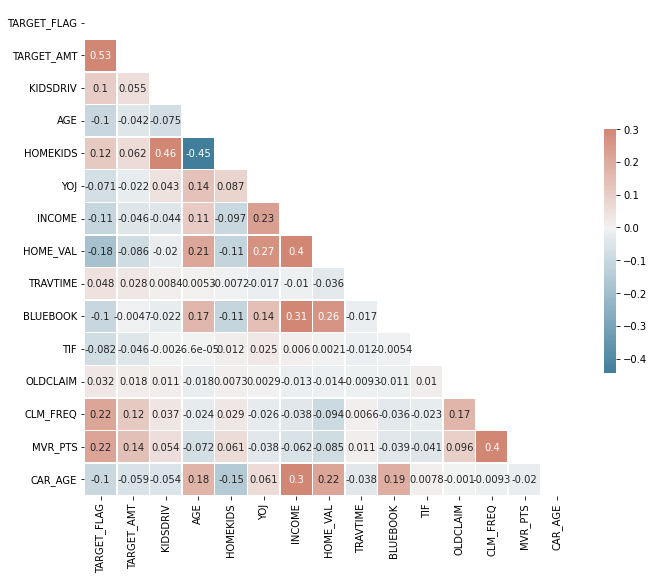

In [34]:
corr = df_train.corr()
mask = np.triu(np.ones_like(corr, dtype=bool)) # Mask for upper triangle

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, annot=True, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

**Salient points :**
- High corrolation between TARGET_AMT and TARGET_FLAG which we have already established in the analysis phase
- High corrolation also between TARGET_FLAG, CLM_FREQ and MVR_PTS. Somthing evident as we discussed.
- INCOME is correlated with HOME_VAL, YOJ and BLUEBOOK. This is an obvious information.


## Feature Importance using Random Forest

In [35]:
from sklearn.model_selection import train_test_split
X = df_train.drop(columns=['TARGET_FLAG', 'TARGET_AMT'])
y = df_train.TARGET_FLAG
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [36]:
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OrdinalEncoder, StandardScaler


numerical_preprocessing = Pipeline(
    steps=[
           ('imput', SimpleImputer(strategy= 'median')),
           ('scal', StandardScaler())
    ]
)

categorical_preprocessing = Pipeline(
    steps=[
           ("Imput", SimpleImputer(strategy='constant', fill_value='missing')),
           ("encod", OrdinalEncoder())
           ]
)



preprocessor = ColumnTransformer(
    transformers=[
                  ('num',numerical_preprocessing, numerical_features), 
                  ('cat',categorical_preprocessing, Categorical_features),
                  ]
)

model = Pipeline(
    steps=[
           ('preprocessor',preprocessor),
           ('classifier',RandomForestClassifier(n_estimators=100))
    ]
)


In [37]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imput',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scal',
                                                                   StandardScaler())]),
                                                  ['KIDSDRIV', 'AGE',
                                                   'HOMEKIDS', 'YOJ',
                                                   'TRAVTIME', 'TIF',
                                                   'CLM_FREQ', 'MVR_PTS',
                                                   'CAR_AGE', 'INCOME',
                                                   'HOME_VAL', 'BLUEBOOK',
                                                   'OLDCLAIM']),
                                                 ('cat',
                

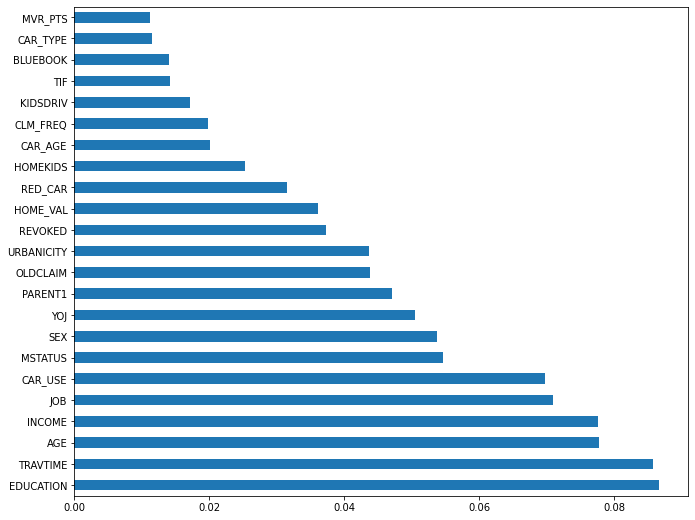

In [38]:
importances = model.get_params()['classifier'].feature_importances_
f, ax = plt.subplots(figsize=(11, 9))
(pd.Series(importances, index=X.columns).sort_values(ascending=False)
   .plot(kind='barh'))

In [39]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
accuracy_score(y_test,y_pred)

0.7937285644292014

This model has performed well giving an accuracy score of 0.7927
According to this classifier, the best features that help predict the target are : "*EDUCATION*", "*TRAVTIME*", "*INCOME*", "*AGE*", "*JOB*" and "*CAR_USE*". 

# Modeling

For the modeling phase, we will use some basic machine learning models (such as Logistic Regression). Then we will try some boosting algorithms (Catboost, HistGradientBoosting). We may also try an imbalanced learning algorithm as our data is imbalanced.

In [40]:
from sklearn.metrics import f1_score   
from sklearn.metrics import roc_curve, auc

numerical_features = ['KIDSDRIV','AGE','HOMEKIDS','YOJ','TRAVTIME','TIF','CLM_FREQ','MVR_PTS','CAR_AGE','INCOME','HOME_VAL','BLUEBOOK','OLDCLAIM']
Categorical_features = ['PARENT1','MSTATUS','SEX','EDUCATION','JOB','CAR_USE','CAR_TYPE','RED_CAR','REVOKED','URBANICITY']

# Creating Pipelines to preprocess data and define the model
numerical_preprocessing = Pipeline(
    steps=[
           ('imput', SimpleImputer(strategy= 'median')),
           ('scal', StandardScaler())
    ]
)

categorical_preprocessing = Pipeline(
    steps=[
           ("Imput", SimpleImputer(strategy='constant', fill_value='missing')),
           ("encod", OrdinalEncoder())
           ]
)

preprocessor = ColumnTransformer(
    transformers=[
                  ('num',numerical_preprocessing, numerical_features), 
                  ('cat',categorical_preprocessing, Categorical_features),
                  ]
)

# Splitting the data
X = df_train.drop(columns=['TARGET_FLAG', 'TARGET_AMT'])
y = df_train.TARGET_FLAG
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)


##Logistic regression

In [41]:
from sklearn.linear_model import LogisticRegression

model_logreg = Pipeline(
    steps=[
           ('preprocessor',preprocessor),
           ('classifier',LogisticRegression())
    ]
)

model_logreg.fit(X_train, y_train)

y_pred_logreg = model_logreg.predict(X_test)


acc_logreg = accuracy_score(y_test,y_pred_logreg)
f1_logreg = f1_score(y_test,y_pred_logreg)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_logreg)
auc_logreg = auc(fpr, tpr)


print("accuracy_score :",acc_logreg)
print("f1_score :", f1_logreg)
print("auc :", auc_logreg)

accuracy_score : 0.7898089171974523
f1_score : 0.49941656942823803
auc : 0.6639546186437534


## Catboost

In [42]:
# !pip install catboost
from catboost import CatBoostClassifier

model_catboost = Pipeline(
    steps=[
           ('preprocessor',preprocessor),
           ('classifier',CatBoostClassifier(verbose=0))
    ]
)

model_catboost.fit(X_train, y_train)

y_pred_catboost = model_catboost.predict(X_test)


acc_catboost = accuracy_score(y_test,y_pred_catboost)
f1_catboost = f1_score(y_test,y_pred_catboost)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_catboost)
auc_catboost = auc(fpr, tpr)


print("accuracy_score :",acc_catboost)
print("f1_score :", f1_catboost)
print("auc :", auc_catboost)

accuracy_score : 0.8074473297403234
f1_score : 0.5569334836527622
auc : 0.6956217676171819


## HistGradientBoosting

In [43]:
from sklearn.ensemble import HistGradientBoostingClassifier

model_HGB = Pipeline(
    steps=[
           ('preprocessor',preprocessor),
           ('classifier',HistGradientBoostingClassifier())
    ]
)

model_HGB.fit(X_train, y_train)

y_pred_HGB = model_HGB.predict(X_test)


acc_HGB = accuracy_score(y_test,y_pred_HGB)
f1_HGB = f1_score(y_test,y_pred_HGB)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_HGB)
auc_HGB = auc(fpr, tpr)


print("accuracy_score :",acc_HGB)
print("f1_score :", f1_HGB)
print("auc :", auc_HGB)

accuracy_score : 0.8000979911807937
f1_score : 0.5612903225806452
auc : 0.6989855481107178


## LGBM

In [44]:
from lightgbm import LGBMClassifier

model_LGBM = Pipeline(
    steps=[
           ('preprocessor',preprocessor),
           ('classifier',LGBMClassifier())
    ]
)

model_LGBM.fit(X_train, y_train)

y_pred_LGBM = model_LGBM.predict(X_test)


acc_LGBM = accuracy_score(y_test,y_pred_LGBM)
f1_LGBM = f1_score(y_test,y_pred_LGBM)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_LGBM)
auc_LGBM = auc(fpr, tpr)


print("accuracy_score :",acc_LGBM)
print("f1_score :", f1_LGBM)
print("auc :", auc_LGBM)

accuracy_score : 0.8059774620284175
f1_score : 0.5732758620689655
auc : 0.7059610642407873


## VotingClassifier

In [45]:
from sklearn.ensemble import VotingClassifier

clfs = [
    ('lc', LGBMClassifier()),
    ('cc', CatBoostClassifier(verbose=0))
    ]

model_vot = Pipeline(
    steps=[
           ('preprocessor',preprocessor),
           ('classifier',VotingClassifier(clfs))
    ]
)


model_vot.fit(X_train, y_train)

y_pred_vot = model_vot.predict(X_test)

acc_vot = accuracy_score(y_test,y_pred_vot)
f1_vot = f1_score(y_test,y_pred_vot)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_vot)
auc_vot = auc(fpr, tpr)


print("accuracy_score :",acc_vot)
print("f1_score :", f1_vot)
print("auc :", auc_vot)

accuracy_score : 0.8049975502204801
f1_score : 0.5339578454332553
auc : 0.6826211270148674


## SMOTE for imbalanced learning

In [46]:
from imblearn.pipeline import Pipeline as Pipeline_imblearn
from imblearn.over_sampling import SMOTE

model_imb = Pipeline_imblearn(steps=[('preprocessor', preprocessor),
                      ('underSampler',SMOTE()),
                      ('classifier', CatBoostClassifier(verbose=0))
                       ])

model_imb.fit(X_train, y_train)

y_pred_imb = model_imb.predict(X_test)


acc_imb = accuracy_score(y_test,y_pred_imb)
f1_imb = f1_score(y_test,y_pred_imb)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_imb)
auc_imb = auc(fpr, tpr)


print("accuracy_score :",acc_imb)
print("f1_score :", f1_imb)
print("auc :", auc_imb)

accuracy_score : 0.7971582557569818
f1_score : 0.56875
auc : 0.7041499405154994


## Sample Weight logistic regression

In [47]:
from sklearn.linear_model import LogisticRegression

model_logreg_w = Pipeline(
    steps=[
           ('preprocessor',preprocessor),
           ('classifier',LogisticRegression())
    ]
)

model_logreg_w.fit(X_train, y_train, classifier__sample_weight=(0.75 - y_train/2))

y_pred_logreg_w = model_logreg_w.predict(X_test)


# METRICS

acc_logreg_w = accuracy_score(y_test,y_pred_logreg_w)
f1_logreg_w = f1_score(y_test,y_pred_logreg_w)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_logreg_w)
auc_logreg_w = auc(fpr, tpr)


print("accuracy_score :",acc_logreg_w)
print("f1_score :", f1_logreg_w)
print("auc :", auc_logreg_w)


accuracy_score : 0.7535521803037727
f1_score : 0.1602671118530885
auc : 0.5402849814621068


## Conclusion

In [51]:
summary = {}
summary['Logistic Regression'] = [auc_logreg, f1_logreg, acc_logreg]
summary['Catboost'] = [auc_catboost, f1_catboost, acc_catboost]
summary['HistGradientBoosting'] = [auc_HGB, f1_HGB, acc_HGB]
summary['LGBM'] = [auc_LGBM, f1_LGBM, acc_LGBM ]
summary['Voting Classifier'] = [auc_vot, f1_vot, acc_vot ]
summary['SMOTE for imbalanced learning'] = [auc_imb, f1_imb, acc_imb ]
summary['Sample Weight Log_REG'] = [auc_logreg_w, f1_logreg_w, acc_logreg_w ]

df_summary = pd.DataFrame.from_dict(summary, orient='index')
df_summary.rename(columns={0: 'AUC', 1: 'F1 Score', 2:'Accuracy'}, inplace=True)
df_summary.sort_values(by='AUC')

,AUC,F1 Score,Accuracy
Sample Weight Log_REG,0.540285,0.160267,0.753552
Logistic Regression,0.663955,0.499417,0.789809
Voting Classifier,0.682621,0.533958,0.804998
Catboost,0.695622,0.556933,0.807447
HistGradientBoosting,0.698986,0.561290,0.800098
SMOTE for imbalanced learning,0.704150,0.568750,0.797158
LGBM,0.705961,0.573276,0.805977


The performances of the models used are not very different but according to AUC metric, the best of them is the LGBM model. Thus we will try to boost its performance by finding its best hyperparameters and then we will proceed to generating predictions.

In [52]:
from sklearn.model_selection import RandomizedSearchCV

param_distributions = {'n_estimators': [int(x) for x in np.linspace(10, 1000, 15)],
                       'max_depth': [10*i for i in range (1,11)]
                       }



model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier',RandomizedSearchCV(estimator= LGBMClassifier(),
                                                         param_distributions= param_distributions,
                                                         n_iter= 100, cv= 5, verbose= 2, n_jobs=4))
                        ])

model.fit(X_train, y_train)
best_params = model.get_params()['classifier'].best_params_
best_params



Fitting 5 folds for each of 100 candidates, totalling 500 fits


{'max_depth': 50, 'n_estimators': 80}

In [53]:
from lightgbm import LGBMClassifier

model_LGBM = Pipeline(
    steps=[
           ('preprocessor',preprocessor),
           ('classifier',RandomForestClassifier(max_depth=20, n_estimators=80))
    ]
)

model_LGBM.fit(X_train, y_train)

y_pred_LGBM = model_LGBM.predict(X_test)


acc_LGBM = accuracy_score(y_test,y_pred_LGBM)
f1_LGBM = f1_score(y_test,y_pred_LGBM)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_LGBM)
auc_LGBM = auc(fpr, tpr)


print("accuracy_score :",acc_LGBM)
print("f1_score :", f1_LGBM)
print("auc :", auc_LGBM)

accuracy_score : 0.780499755022048
f1_score : 0.4716981132075472
auc : 0.6492801262407032


It seems that the model performs better with its defaul hyperparameters.

# Generating Predictions

In [54]:
df_test = pd.read_csv(data_folder + "test_auto.csv")
df_test.head()
other_features = ["INCOME", "HOME_VAL", "BLUEBOOK", "OLDCLAIM"]
for feature in other_features :
  df_test[feature] = pd.to_numeric(df_test[feature].str.replace(',','.').str[1:])

In [55]:
# Model choice 
clf = Pipeline(
    steps=[
           ('preprocessor',preprocessor),
           ('classifier',RandomForestClassifier(max_depth=20, n_estimators=80))
    ]
)

# fitting model
clf.fit(X,y)

# Making predictions
X_pred = df_test.drop(columns=['TARGET_FLAG', 'TARGET_AMT'])
y_pred = clf.predict(X_pred)


In [56]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [58]:
df_test['TARGET_FLAG'] = y_pred
df_test.to_csv('auto_test_with_predictions.csv', index=False)

# Conclusion

To sum up what we have seen during this technical test, the objective of this project is classify individuals as risky or not according to many features. 

All the features are somehow helpful to make the prediction. They bring up important information even if some of them are highly correlated.

We have tested many machine learning algorithms for the classification task and most of them were well performing. We tried to solve the problem of imbalanced data by working on imbalanced learning algorithms but the result was not as expected.

To evaluate the performances of the implemented models we have calculated three metrics. But the one that was decicive is the AUC which stands for the Area Under ROC Curve. This metric gives us an idea about the True Positives and the False Negatives and it is best to maximize this metric because in our case we should avoid the False Negatives. In fact, to predict a person is risky while he is not truly risky is better then predicting a person is not risky when in reality he is risky. 

Some improvements to this work :
- Trying some data augmentation methods to avoid the imbalanced data problem.
- Implementing the grid search for each model in order to get the best hyperparameters and trying out more parameters of the grid. 
- Maybe some feature engineering could do boost the performance.